In [13]:
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

In [49]:
transform = transforms.Compose([transforms.Resize(32), 
                                transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

alldataset = torchvision.datasets.ImageFolder(root='./leapGestRecog/00', transform=transform)

for i in range(1, 10):
    folder = torchvision.datasets.ImageFolder(root='./leapGestRecog/0{}'.format(i), transform=transform)
    alldataset = torch.utils.data.ConcatDataset([alldataset, folder])
    
num_train = len(alldataset)
indices = list(range(num_train))
split = int(np.floor(0.1 * num_train))

np.random.seed(42)
np.random.shuffle(indices)

train_idx, test_idx = indices[split:], indices[:split]
train_idx, valid_idx = train_idx[split:], train_idx[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(
    alldataset, batch_size=4, sampler=train_sampler,
    num_workers=2
)
valid_loader = torch.utils.data.DataLoader(
    alldataset, batch_size=4, sampler=valid_sampler,
    num_workers=2
)
test_loader = torch.utils.data.DataLoader(
    alldataset, batch_size=4, sampler=test_sampler,
    num_workers=2
)

classes = ('01_palm', '02_l', '03_fist', '04_fist_moved',
           '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down')

In [50]:
print(len(train_loader), len(valid_loader), len(test_loader))

4000 500 500


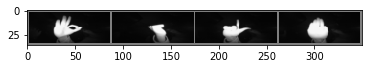

07_ok 04_fist_moved  02_l 01_palm


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))